In [1]:
from sklearn.neighbors import KDTree
from biopandas.pdb import PandasPdb
from pathlib import Path
import pandas as pd


In [2]:
#PDBS_MUT = Path("skempiAB-mutRepair/")
PDBS_MUT = Path("../data/modelled_mutations/")


#pdbfiles = list(PDBS_MUT.glob("*clean.pdb"))
pdbfiles = list(PDBS_MUT.glob("*clean.pdb"))

In [3]:
ppdb = PandasPdb().read_pdb(str(pdbfiles[0]))

In [4]:
xyz_col = ["x_coord","y_coord","z_coord"]
xyz_data = ppdb.df["ATOM"][xyz_col]

In [5]:
pdbAtom = ppdb.df["ATOM"]
pdbAtom['atom'] = pdbAtom.chain_id.astype(str)+'/'+pdbAtom.residue_number.astype(str)+'/'+pdbAtom.atom_name.astype(str)

In [6]:
tree = KDTree(xyz_data)
ind,dist = tree.query_radius(xyz_data,r=5,count_only=False,return_distance = True)

In [9]:
contact_pandas = list()
for i,x in enumerate(ind):
    atom_end = pdbAtom.atom.iloc[x]
    atom_bgn = [pdbAtom.atom.iloc[i]]*atom_end.shape[0]
    distance = dist[i]
    
    df = pd.DataFrame({'atom_bgn':atom_bgn,'atom_end':atom_end,'distance':distance})
    contact_pandas.append(df)
contact_pandas = pd.concat(contact_pandas)
contact_pandas.reset_index(drop=True,inplace=True)

In [11]:
# Drop same atom contact 
contact_pandas2 = contact_pandas.loc[-(contact_pandas.distance == 0)]
# evaluate if contact are from same chain or not
contact_pandas3 = contact_pandas2.loc[-(contact_pandas2.atom_bgn.str[0] == contact_pandas2.atom_end.str[0])]

In [12]:
contact_pandas3

,atom_bgn,atom_end,distance
10628,A/54/CE1,D/488/O,4.845410
10850,A/55/CD,D/488/O,4.831416
10871,A/55/NE,D/490/O,4.514444
10876,A/55/CZ,D/489/CA,4.581961
10877,A/55/CZ,D/489/C,4.798825
10879,A/55/CZ,D/490/CD,4.854176
10883,A/55/CZ,D/490/N,4.623860
10889,A/55/CZ,D/490/O,3.207136
10890,A/55/CZ,D/490/C,4.362402
10897,A/55/NH1,D/488/O,4.768090


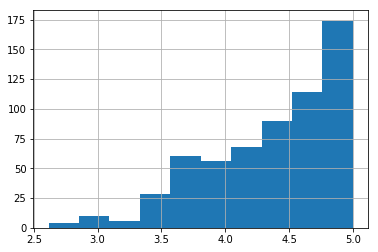

In [69]:
%matplotlib inline
contact_pandas3.distance.hist()